## Importing packages

In [14]:
import cv2
import matplotlib.pyplot as plt

## Reading and displaying an image

In [15]:
image = cv2.imread('images/car1.jpeg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

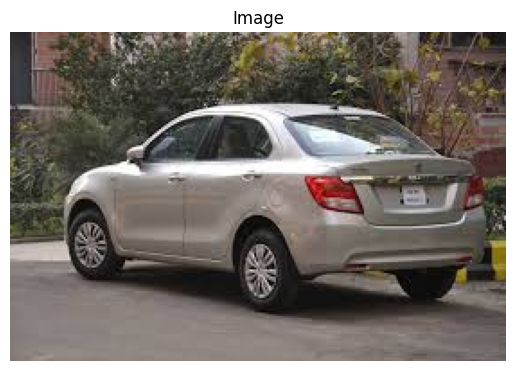

In [18]:
plt.axis('off')
plt.title("Image")
plt.imshow(img)

## Image Conversion to Different Types